In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv(r'/Users/bendavid/Desktop/Data/sqf-2019.csv')

In [4]:
# Drop nans
race = df['SUSPECT_RACE_DESCRIPTION'].dropna()

In [5]:
# Create DataFrame

df1 = pd.DataFrame(race)
k = pd.DataFrame(df['SUSPECT_RACE_DESCRIPTION'].value_counts())
k = k.sort_index()
length = len(race)
k.columns = ["Practices"]
k["Percentage"] = k["Practices"]/length*100 
k['Races'] = ['Unknown','AMERICAN INDIAN/ALASKAN N','ASIAN / PACIFIC ISLANDER','BLACK',
              'BLACK HISPANIC','WHITE','WHITE HISPANIC']
k

,Practices,Percentage,Races
(null),85,0.631548,Unknown
AMERICAN INDIAN/ALASKAN N,8,0.059440,AMERICAN INDIAN/ALASKAN N
ASIAN / PACIFIC ISLANDER,301,2.236422,ASIAN / PACIFIC ISLANDER
BLACK,7981,59.298611,BLACK
BLACK HISPANIC,1127,8.373579,BLACK HISPANIC
WHITE,1215,9.027417,WHITE
WHITE HISPANIC,2742,20.372985,WHITE HISPANIC


In [6]:
# These are stop and frisk % broken down by race

stops_per = np.array([0.631548, 0.059440,2.236422,59.298611,8.373579,9.027417,20.372985])
race = np.array(['Unknown','AMERICAN INDIAN','ASIAN','BLACK','BLACK HISPANIC',
                 'WHITE','WHITE HISPANIC'])


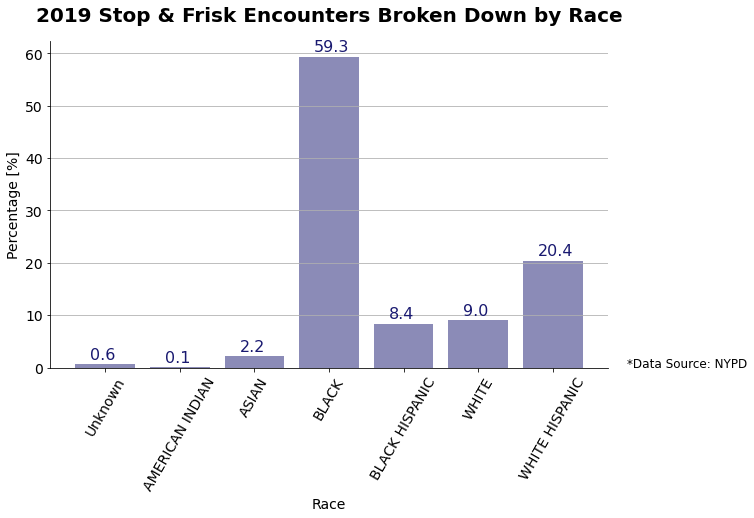

In [8]:
# Create a bar graph that shows COVID-19 deaths
x_values = race
y_values = stops_per

fig, axs = plt.subplots(figsize=(10,6))      
axs.bar(x_values, y_values, color='#191970', alpha=0.5)    
axs.set_title("2019 Stop & Frisk Encounters Broken Down by Race", fontsize=20, fontweight="bold", pad=20)   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Percentage [%]", fontsize=14)
axs.tick_params(labelsize=14)   

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

# Create a new variable that has the values rounded to 1 decimal place for textb
y_value1 = np.round(stops_per, decimals=1)

for i in range(len(x_values)):
    plt.text(i-0.2, y_value1[i]+1, str(y_value1[i]), color='#191970', size=16)
    
plt.xticks(rotation=60)

plt.grid(axis='y')
plt.text(7, 0, "*Data Source: NYPD", fontsize=12)

plt.show()